In [1]:
%config Completer.use_jedi = False

from utils import *
from parallel import find_sigma_em
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import importlib
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
from scipy import signal

In [2]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = [12,8]

In [3]:
with open("dumps/susceptibility-N32-4e7-v2.pkl", "rb") as f:
    results = pickle.load(f)

In [4]:
df = pd.DataFrame(results, columns=find_sigma_em.column_names)

$$\chi=\frac{1}{N T}\left[\left\langle M^{2}\right\rangle-\langle|M|\rangle^{2}\right]$$

In [5]:
df["M^2"] = df.std_M**2 + df.mean_M**2

df["xi"] = (df["M^2"]-df["mean_abs_M"]**2)/df.N**2/df.temp
df["xi1"] = (df["M^2"]-df["mean_M"]**2)/df.N**2/df.temp

In [8]:
with open("dumps/chi-from-Hysteresis.pkl", "rb") as f:
    Ts1, Chis1 = pickle.load(f)

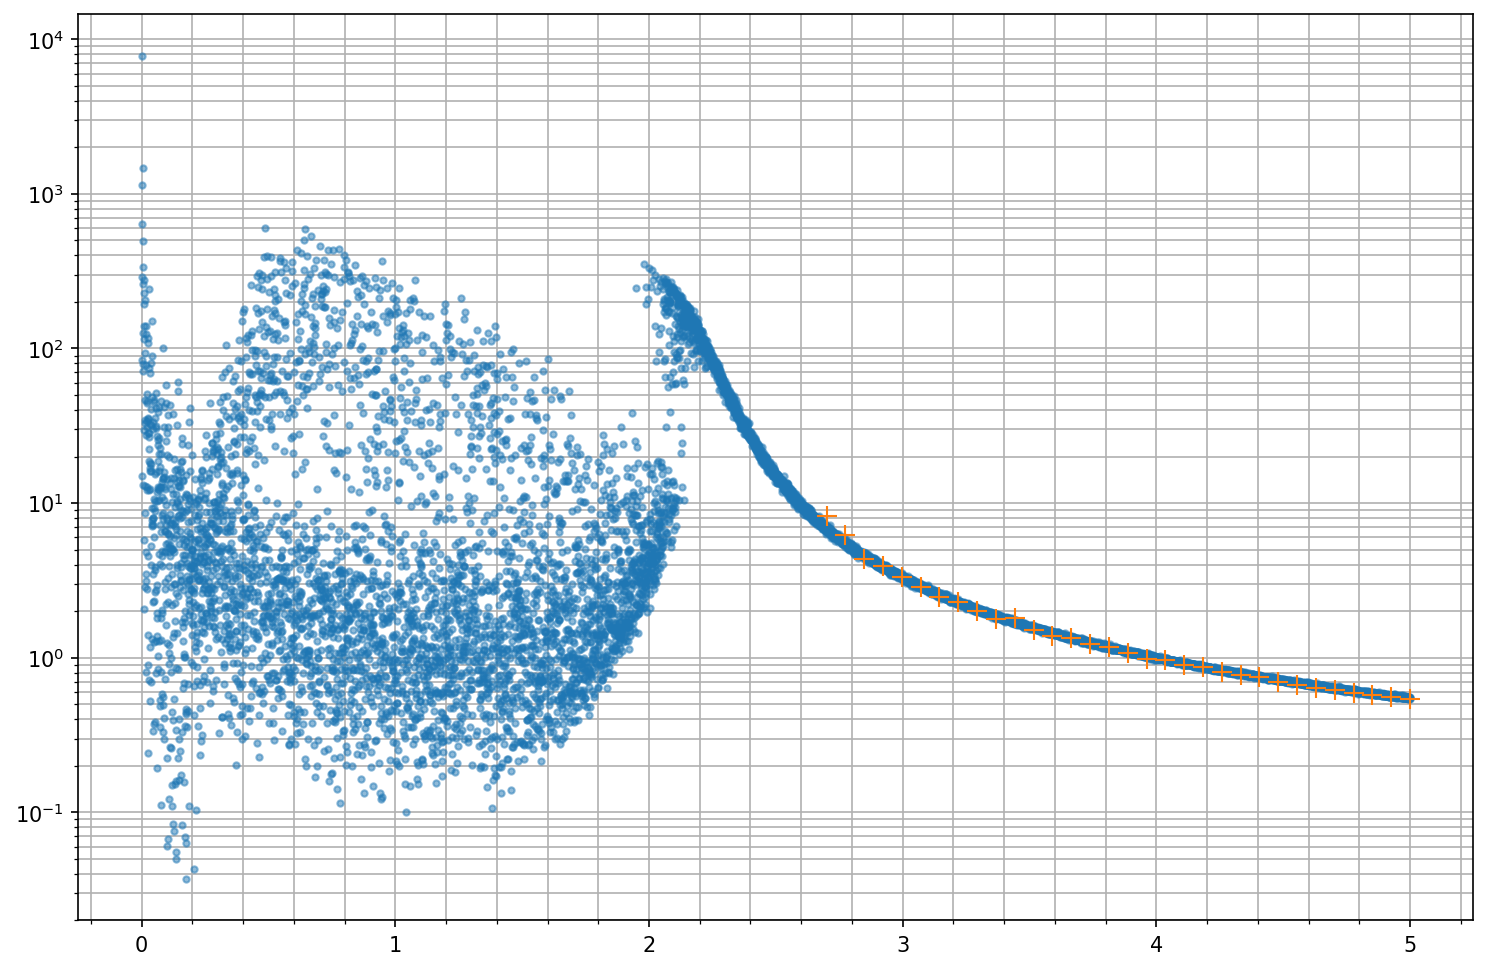

In [16]:

# plt.plot(df.temp, df.xi, alpha=0.5, marker=".")
w=21
# plt.plot(moving_average(df.temp.values, w=w), moving_average(df.xi.values, w=w), )
plt.gca().set_yscale("log")
plt.minorticks_on()
plt.grid(which="both")


plt.plot(df.temp, df.xi1, alpha=0.5, marker=".", lw=0)
w=21
# plt.plot(moving_average(df.temp.values, w=w), moving_average(df.xi1.values, w=w), )

plt.plot(Ts1, Chis1, "+", ms=10)

# plt.gca().set_yscale("log")
# plt.minorticks_on()
# plt.grid(which="both")